<a href="https://colab.research.google.com/github/MRamsey28/Astro1221/blob/main/HAT_P_1_b_transitMaggie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #importing the packages we will be using in the future
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as ac

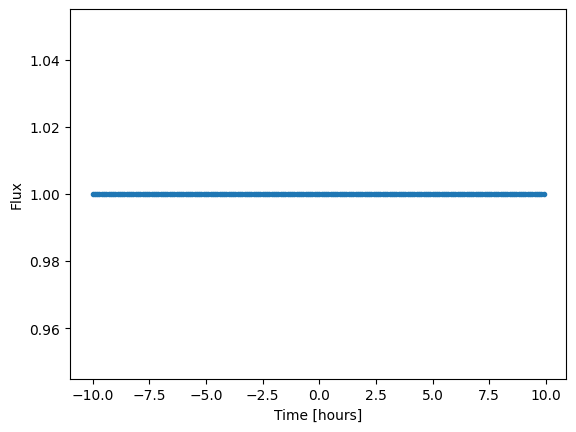

In [3]:
#first we will try and make a model for what a transit looks like graphically
time_arr = np.arange(-10, 10, 0.1) *u.hour #from a time range of -10 hours to 10 hours
flux_arr = np.zeros(np.shape(time_arr)) +1.0 #makes the flux (reduction of light) all one
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".") #ploting this
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show()

In [4]:
#setting values for what we want data wise for our graph
tau = 2.0 *u.hour #this is the duration of the transit (changing this increases or decreases transit length)
t_0 = 1.0 *u.hour #this is the middle point of the transit (changing this shifts the transit left or right)
time_start = t_0 - tau / 2 #this is when the transit will start (when the graph will dip down)
time_end = t_0 + tau / 2 #this is when the transit will end (when the graph will dip up)
print (time_start, time_end) #lets us know that it will start at 0 hours and end at 2 hours

0.0 h 2.0 h


In [5]:
for i in range(len(time_arr)):
  if i < 10:
    print ("index=", i, "Value=", time_arr[i]) #setting values for each point along the line

index= 0 Value= -10.0 h
index= 1 Value= -9.9 h
index= 2 Value= -9.8 h
index= 3 Value= -9.700000000000001 h
index= 4 Value= -9.600000000000001 h
index= 5 Value= -9.500000000000002 h
index= 6 Value= -9.400000000000002 h
index= 7 Value= -9.300000000000002 h
index= 8 Value= -9.200000000000003 h
index= 9 Value= -9.100000000000003 h


In [6]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) #values where transit happens (when start<time<end)
print (time_arr[ind]) #the start and end help us clarify where the transit happens

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] h


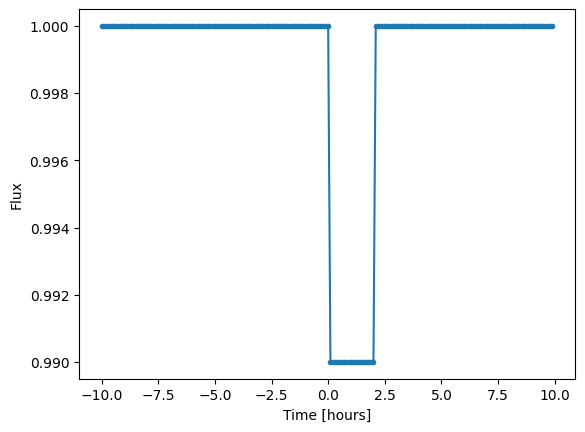

In [7]:
delta = 0.01 #graphing what we just definded
flux_arr[ind] = 1.0 - delta
plt.plot(time_arr, flux_arr, linestyle = "-", marker = ".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show()

In [8]:
#now we will the graph its own function so we can turn it into a model
def generate_transit_lightcurve(time_arr, t_o, tau, delta):
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0
  time_start = t_0 - tau / 2
  time_end = t_0 + tau / 2
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
  flux_arr[ind] = 1.0 - delta #in the ind windown (which is our transit window) the flux will drop by 0.01
  return flux_arr

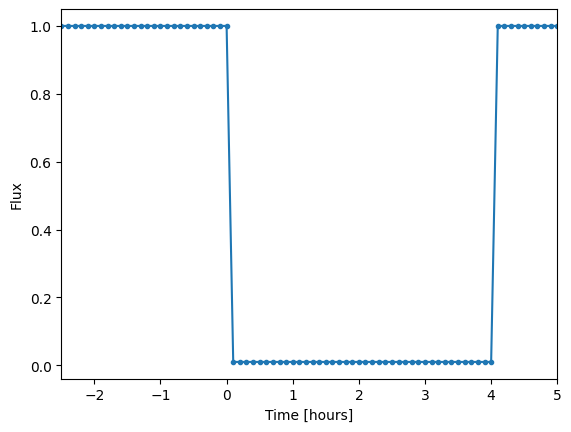

In [9]:
time_arr = np.arange(-10,10,0.1) *u.hour #we will now graph a different example using the model we just set
tau = 4.0 * u.hour
t_0 = 2.0 * u.hour
delta = 0.99

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta)
plt.plot(time_arr, flux_arr, linestyle = "-", marker = ".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.xlim(-2.5,5) #zooming in so we can look at it and make it is graphing what we wanted
# plt.ylim(0, 0.02) -> shows that is is infact changed by 0.99
plt.show() #this is as your model! you can use this to graph any data you get

In [10]:
#now we are going to compare this model to actural data
from google.colab import files #upload the data
#select plot.tbl, data for HAT-P-1b of (Johnson et al. 2008) data from NASA Archive
uploaded = files.upload()

Saving plot.tbl to plot.tbl


In [11]:
import astropy.io.ascii #read the data and put it into something usable by us
dat = astropy.io.ascii.read("plot.tbl")
dat #showing our data

set,HJD,Relative_Flux
int64,float64,float64
0,2454363.83094,1.0006
0,2454363.83151,1.0006
0,2454363.8326,0.9973
0,2454363.83316,1.0004
0,2454363.83373,0.9984
0,2454363.83493,1.0007
0,2454363.83551,1.0024
0,2454363.83681,1.0006
0,2454363.83734,0.9978


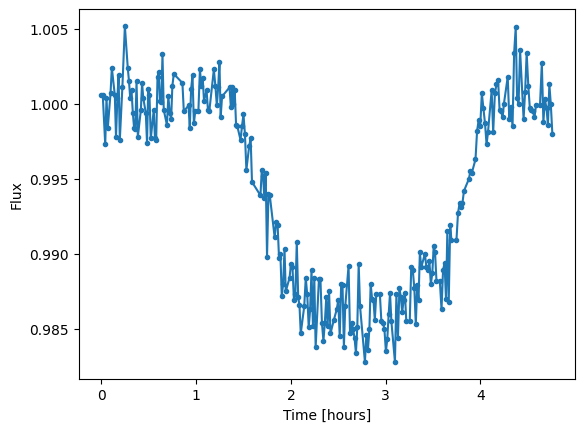

In [111]:
time_obs = dat["HJD"] #putting our time data in
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour #our time was in days, we are putting it into hours
flux_obs = dat["Relative_Flux"] # putting our flux data in
plt.plot (time_obs, flux_obs, marker = ".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show() #ploting the transit for HAT-P-1b

In [48]:
#now we are plotting the estimated values for our model
t_0 = 2.7 * u.hour
tau =  2.4 * u.hour
delta = 0.015
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta)

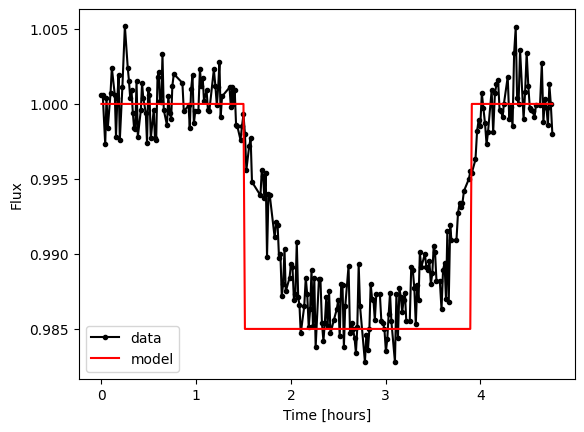

In [49]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") #graphing our data
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") #graphing our model
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.legend()

plt.show() #re-plotting with model

In [50]:
#Finding the error to perform the reduced Chi squared
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind])

degree_of_freedom = len(time_obs) - 3
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom #finding the reduced chi squared
print(reduced_Chi2)

5.4712288561723925


In [95]:
#Making better estimations, guess and checking based on the reduced chi squared
t_0 = 2.8 * u.hour
tau =  2.0 * u.hour
delta = 0.014
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta)

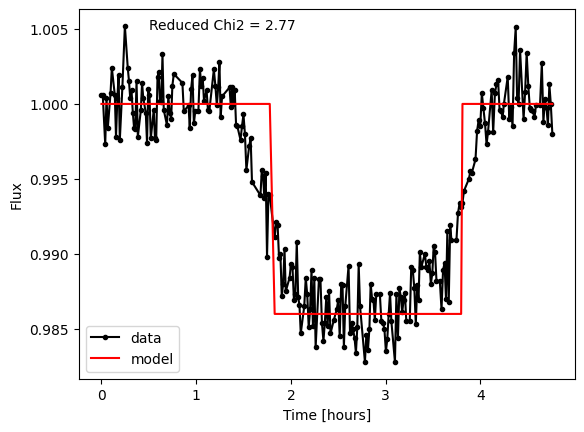

In [96]:
#graphiing again but putting the Chi squared value on the graph
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") #graphing our data
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") #graphing our model
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.legend()

degree_of_freedom = len(time_obs) - 3
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom
plt.annotate("Reduced Chi2 = {0:4.2f}".format(reduced_Chi2), xy=[0.5, 1.005]) #listing the reduced Chi squared on our graph
plt.show()

In [53]:
#making a new, trapizodial model for a more acurrate chi squared
# used google gemini to help come up with an if else statment for the model
def trapizoid_model(time_arr, t_o, tau, delta, ingress_egress_time):
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0
  time_start = t_0 - tau / 2
  time_end = t_0 + tau / 2

  #Find the indices for the transit
  transit_start = np.where(time_arr >= time_start)[0][0]
  transit_end = np.where(time_arr <= time_end)[0][-1]

  #changing the flux array for a trapezoidal shape (#making the lines down/up an adjustable V slope)
  for i in range(transit_start, transit_end + 1):
      if time_arr[i] < time_start + ingress_egress_time:
        flux_arr[i] = 1.0 - delta * (time_arr[i] - (time_start)) / ingress_egress_time
      elif time_arr[i] > time_end - ingress_egress_time:
        flux_arr[i] = 1.0 - delta * (time_end - time_arr[i]) / ingress_egress_time
      else:
          flux_arr[i] = 1.0 - delta

  return flux_arr

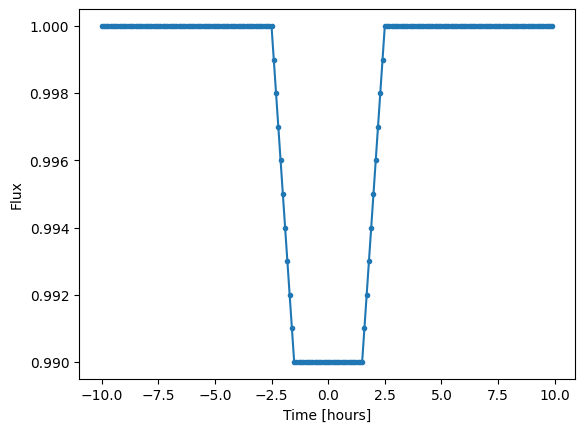

In [54]:
#demonstrating the model in action
time_arr = np.arange(-10,10,0.1) *u.hour
tau = 5.0 * u.hour
t_0 = 0.0 * u.hour
delta = 0.01
ingress_egress_time = 1 * u.hour
flux_arr = trapizoid_model(time_arr, t_0, tau, delta, ingress_egress_time)
plt.plot(time_arr, flux_arr, linestyle = "-", marker = ".")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show()

In [73]:
#estimating the data for the new model
t_0 = 2.7 * u.hour
tau = 2.7 * u.hour
delta = 0.015
ingress_egress_time = 0.7 * u.hour
flux_model2 = trapizoid_model(time_obs, t_0, tau, delta, ingress_egress_time)

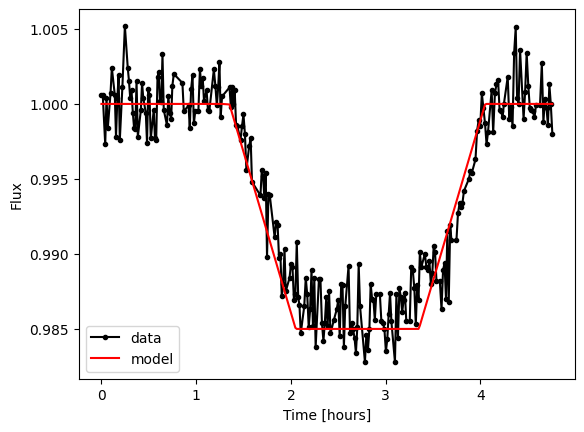

In [74]:
#graphing the new model
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data")
plt.plot(time_obs, flux_model2, linestyle="-", color="red", label="model")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.legend()

plt.show()

In [75]:
# Now we find the error in the new data so we can calculate reduce Chi2
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind])

degree_of_freedom = len(time_obs) - 3
reduced_Chi2 = np.sum(((flux_obs - flux_model2) / error)**2) / degree_of_freedom
print(reduced_Chi2)

1.5226942614463883


In [109]:
#trying again to make it more acurrate with the better model
t_0 = 2.76 * u.hour
tau = 2.72 * u.hour
delta = 0.014
ingress_egress_time = 0.7 * u.hour
flux_model2 = trapizoid_model(time_obs, t_0, tau, delta, ingress_egress_time)

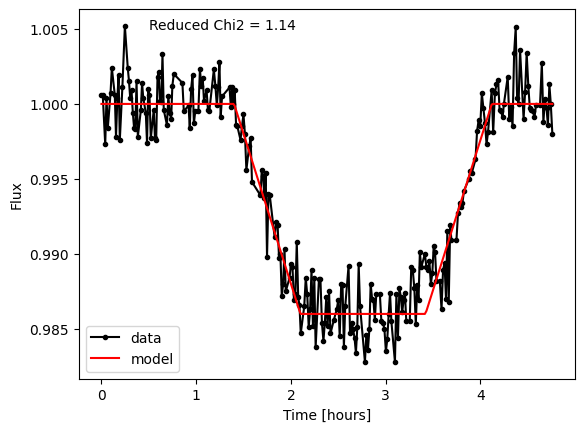

In [110]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data")
plt.plot(time_obs, flux_model2, linestyle="-", color="red", label="model")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.legend()

degree_of_freedom = len(time_obs) - 3
reduced_Chi2 = np.sum(((flux_obs - flux_model2) / error)**2) / degree_of_freedom
plt.annotate("Reduced Chi2 = {0:4.2f}".format(reduced_Chi2), xy=[0.5, 1.005]) #listing the reduced Chi squared on our graph
plt.show()